In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [2]:
#Read dataset

housing = pd.read_csv('housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Doing EDA

df = pd.DataFrame(housing)

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.isnull().sum()

#total_bedrooms have 207 null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
#Decided to change the ' ' value to 0.

df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [7]:
#Check for null values again

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,532.476211,422.678333,0.0000,292.0000,431.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [9]:

df['median_income'].replace("\n","")


0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [10]:
def facetgrid(train, var):
    facet = sns.FacetGrid(train, hue="ocean_proximity", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

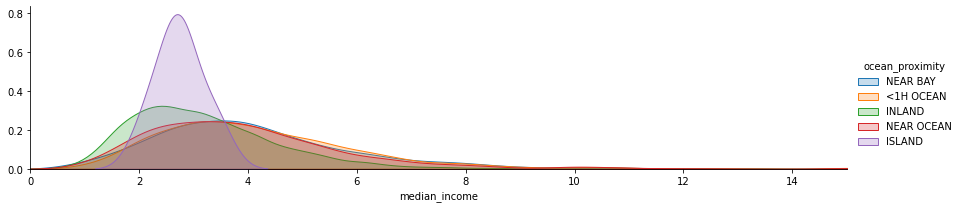

In [11]:
facetgrid(df, 'median_income')

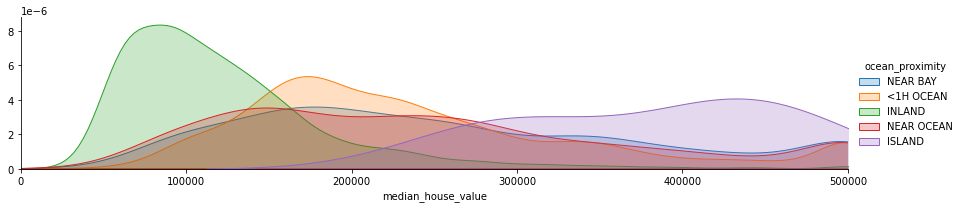

In [12]:
facetgrid(df, 'median_house_value')

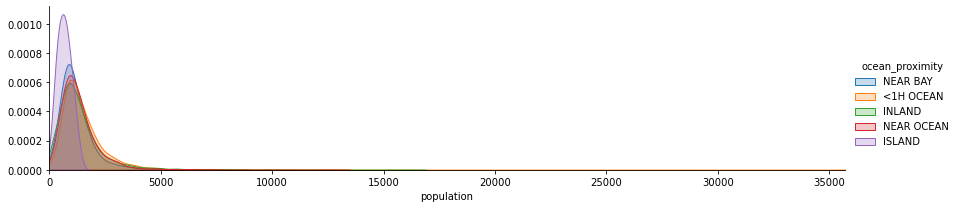

In [13]:
facetgrid(df, 'population')

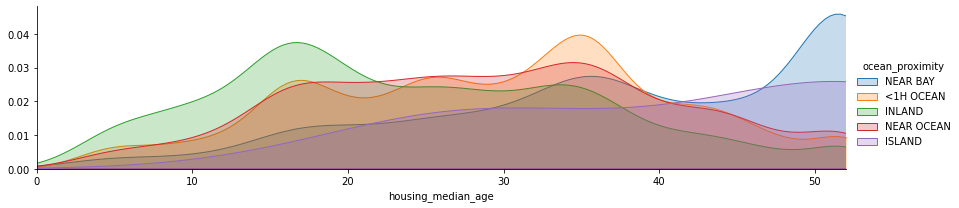

In [14]:
facetgrid(df, 'housing_median_age')

In [15]:
df2 = df.drop(columns = ['longitude','latitude'])

df2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
df2.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148
population,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000


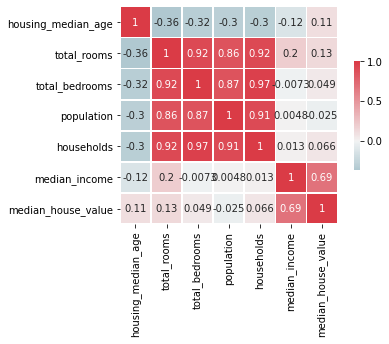

In [17]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df2.corr(),cmap = cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [18]:
# find features for prediction

feature_cols = ['median_income']

X = df[feature_cols].values.reshape(-1,1)

y = df['median_house_value']

In [19]:
# Using linearRegression


linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

linreg.fit(X_train, y_train)



LinearRegression()

In [20]:
pickle.dump(linreg, open('model.pkl', 'wb'))

In [21]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([154403.92354848, 200149.58057834, 172821.06022841, ...,
       308765.38191434, 148888.34233109, 121027.79907549])

In [72]:
linreg.coef_

array([41564.28950559])

In [71]:
linreg.intercept_

46644.346576290525

In [23]:
linreg.score(X_test,y_test)

0.4688992397483429

In [24]:
# Accuracy score is only for classification problems.
# For regression problems we can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

In [25]:
ypred = pickled_model.predict(X_test)

ypred

array([154403.92354848, 200149.58057834, 172821.06022841, ...,
       308765.38191434, 148888.34233109, 121027.79907549])

In [26]:
mse = mean_squared_error(y_test, ypred)
mse

7079440344.2035885

In [27]:
r2 = r2_score(y_test, ypred)

r2

0.4688992397483429

In [28]:
rmse = mean_squared_error(y_test, ypred, squared=False)

rmse

84139.41017266277

In [29]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.509e+04   1322.872     34.082      0.0

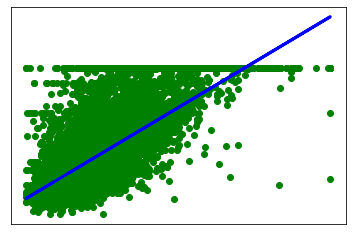

In [30]:
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, ypred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
## Build a classification model to predict stroke (= 1 if a person had a stroke else 0). 

In [32]:
health = pd.read_csv('healthcare-dataset-stroke-data.csv')

health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
#Doing EDA

df_health = pd.DataFrame(health)

df_health

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [34]:
df_health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [35]:
df_health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [36]:
#decided to fill nan values with mean of the column bmi

df_health['bmi'] = df_health['bmi'].fillna(df_health['bmi'].mean())

In [37]:
#check for null values again

df_health.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [38]:


def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="stroke", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

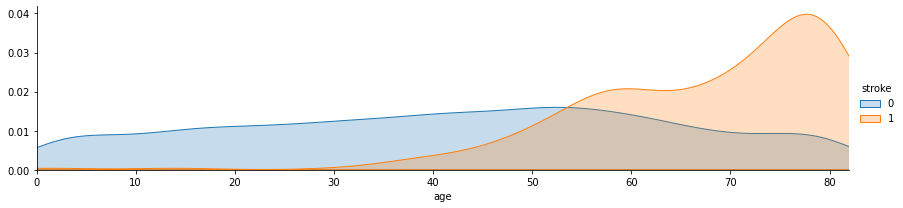

In [39]:
facetgridplot(df_health, 'age')

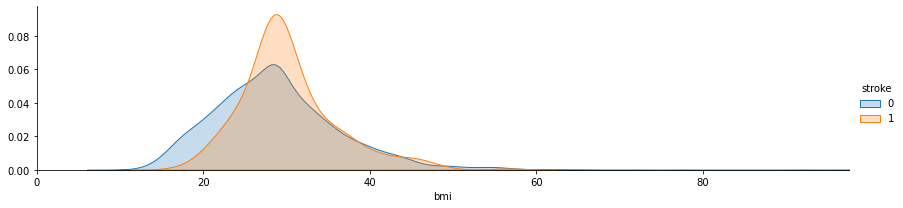

In [40]:
facetgridplot(df_health, 'bmi')

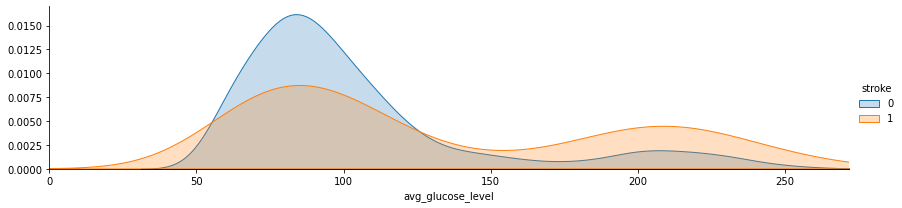

In [41]:
facetgridplot(df_health, 'avg_glucose_level')

In [42]:
df_health.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [43]:
df_health

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [44]:
df_with_dummies = pd.get_dummies(data = df_health, columns = ['work_type', 'Residence_type', 'smoking_status','gender','ever_married'], 
                                      prefix = ['work_type', 'Residence_type', 'smoking_status','gender','ever_married'] )
df_with_dummies.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes
0,9046,67.0,0,1,228.69,36.600000,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,31112,80.0,0,1,105.92,32.500000,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [45]:
# find features for prediction

X1 = df_with_dummies.drop(['id','stroke'],axis=1).values

y1 = df_health['stroke']

In [46]:
X1

array([[67.,  0.,  1., ...,  0.,  0.,  1.],
       [61.,  0.,  0., ...,  0.,  0.,  1.],
       [80.,  0.,  1., ...,  0.,  0.,  1.],
       ...,
       [35.,  0.,  0., ...,  0.,  0.,  1.],
       [51.,  0.,  0., ...,  0.,  0.,  1.],
       [44.,  0.,  0., ...,  0.,  0.,  1.]])

In [47]:
y1

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,train_size = 0.8, random_state=42)

In [49]:
model = LogisticRegression()

In [73]:
model.fit(X1_train, y1_train)

In [51]:
pickle.dump(model, open('model1.pkl', 'wb'))

In [52]:
pickled_hmodel = pickle.load(open('model1.pkl', 'rb'))
pickled_hmodel.predict(X1_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
pickled_hmodel.coef_

array([[ 0.07003727,  0.32317358,  0.23216355,  0.00377508, -0.0037223 ,
        -0.53498594, -0.04345293, -0.36789975, -0.73668675, -0.68611916,
        -1.21188735, -1.15725719, -0.59113022, -0.62961488, -0.71241424,
        -0.43598518, -1.19043705, -1.17870748,  0.        , -1.0481768 ,
        -1.32096773]])

In [54]:
pickled_hmodel.intercept_

array([-2.66678786])

In [55]:
pickled_hmodel.score(X1_test, y1_test)

0.9393346379647749

In [56]:
# Make predictions on the test data
y1_pred = pickled_hmodel.predict(X1_test)

y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
pickled_hmodel.score(X1_test, y1_pred)

1.0

In [58]:
y1_pred.shape

(1022,)

In [59]:


# Calculate accuracy_score
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [60]:
# Confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[960   0]
 [ 62   0]]


In [61]:


print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Titanx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Titanx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Titanx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
y_prob = model.predict_proba(X1_test)

In [63]:
y_prob

array([[0.99395836, 0.00604164],
       [0.9924963 , 0.0075037 ],
       [0.99861742, 0.00138258],
       ...,
       [0.97472755, 0.02527245],
       [0.94884282, 0.05115718],
       [0.81893072, 0.18106928]])

In [64]:
probs = y_prob[:,1]

probs #first column represents the probability of the negative class and the second column represents the probability of the positive class

array([0.00604164, 0.0075037 , 0.00138258, ..., 0.02527245, 0.05115718,
       0.18106928])

In [65]:
auc = roc_auc_score(y1_test, probs)

auc

0.8530913978494624

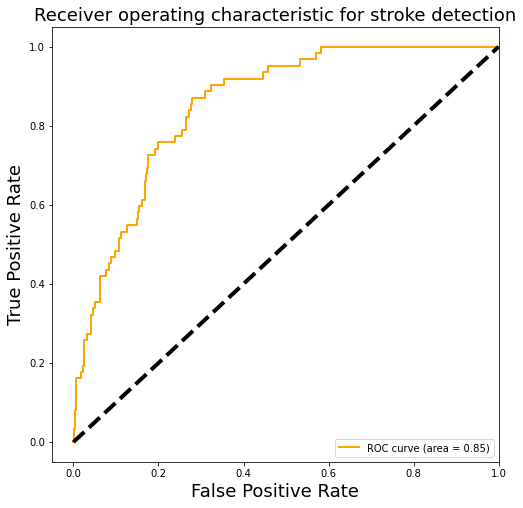

In [66]:

# Find fpr, tpr
fpr, tpr, thresholds = roc_curve(y1_test, probs)
# Find auc
roc_auc = metrics.auc(fpr, tpr)
# Plot of a ROC curve for probability (has_stroke)
plt.figure(figsize=[8,8])

# Plot fpr, tpr

plt.plot(fpr, tpr, 'k-', linewidth=2,color = 'orange',label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for stroke detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [67]:
probsn = y_prob[:,0]

In [68]:
auc1 = roc_auc_score(y1_test, probsn)

auc1

0.14690860215053764

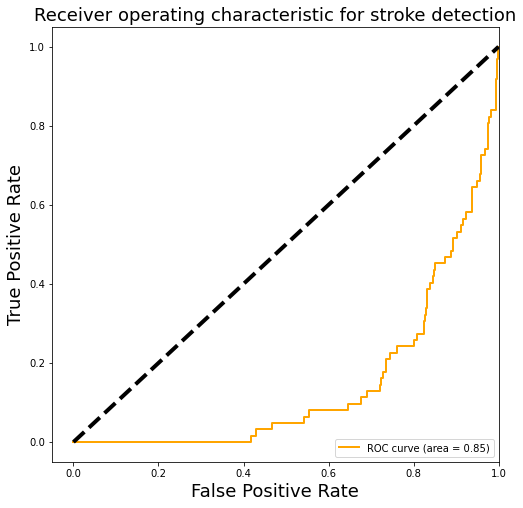

In [69]:
# Find fpr, tpr
fpr, tpr, thresholds = roc_curve(y1_test, probsn)
# Find auc
roc_auc1 = metrics.auc(fpr, tpr)
# Plot of a ROC curve for probability (has_stroke)
plt.figure(figsize=[8,8])

# Plot fpr, tpr

plt.plot(fpr, tpr, 'k-', linewidth=2,color = 'orange',label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for stroke detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [70]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
